# Read HDF files from results database
This notebook shows how to extract results from hdf (`.h5`) files that are already present in the `\results_database\` folder that is present in each benchmark folder (in `\models\`). These files can store either experimental or computational results of the same experiment/simulation. The `\results_database\` folder of the should have all the same structure and same ways to extract the data (e.g. the name of the tally).

For this tutorial notebook the `\results_database\` folder is replaced with the `\example_database\` folder. The `\example_database\` folder contains some of the actual results from the **fng-streaming** benchmark as example.

In [20]:
import openmc_sinbad_benchmarks as osb
import matplotlib.pyplot as plt
import numpy as np

First we need to instantiate a `ResultsFromDatabase` object by providing the name of the file to read (`filename`) and its path (`path`).

In [2]:
experiment_file = osb.ResultsFromDatabase(filename='experiment.h5', path='example_database')
mcnp_fendl1_file = osb.ResultsFromDatabase(filename='mcnp_fendl1.h5', path='example_database')

Usually the file is read from a **postprocessing** notebook that is in the benchmark/model folder with contains the `\results_database\` folder. Therefore, the `path` argument defaults to a `\results_database\` folder.

### Extract info
If present, it is possible to extract and print some information regarding the experiment/simulation that produced the results present in the hdf file. Typical information can be:
- `when` the experiment/simulation have been performed
- `Where` the experiment/simulation have been performed (either place or institution)
- `literature_info` regarding the experiment/model/simulation (most likely the link to a paper or report)
- `code_version` if the hdf file refers to simulation results, useful info for V&V purposes
- `xs_library` (nuclear data library name and version) if the hdf file refers to simulation results, useful info for V&V purposes

Example of experimental information extraction:

In [3]:
when = experiment_file.when
where = experiment_file.where
literature = experiment_file.literature_info

print(f'When: {when}')
print(f'Where: {where}')
print(f'Literature: {literature}')

When: ['1997-1998']
Where: ['ENEA, Frascati (Italy)']
Literature: ['https://doi.org/10.1016/S0920-3796(00)00205-2']


It is also possible to print all the information at once with the `print_all_info` method:

In [4]:
experiment_file.print_all_info()

When: ['1997-1998'] 
 Where: ['ENEA, Frascati (Italy)'] 
 Code version:n/a 
 XS library: n/a 
Literature: ['https://doi.org/10.1016/S0920-3796(00)00205-2'] 



Similarly, for hdf files containing numerical simulation results:

In [5]:
cv = mcnp_fendl1_file.code_version
xslib = mcnp_fendl1_file.xs_library
literature = mcnp_fendl1_file.literature_info

mcnp_fendl1_file.print_all_info()

When: n/a 
 Where: n/a 
 Code version:MCNP-4A/B 
 XS library: FENDL-1.0 
Literature: ['https://doi.org/10.1016/S0920-3796(00)00205-2'] 



In the case of hdf file containing simulation results it is possible to print just the `code_info`. Namely the `code_version` and `xs_library`:

In [7]:
mcnp_fendl1_file.print_code_info()

Code version:MCNP-4A/B 
 XS library: FENDL-1.0 



### Extract a tally

In order to extract a tally from a hdf file it is necessary to know its exact name. The `ResultsFromDatabase` object has a `list_tallies()` method that helps identifying the names of all the tallies available:

In [13]:
experiment_file.list_tallies()

<KeysViewHDF5 ['nuclear_heating', 'rr_offaxis_al27', 'rr_offaxis_au197', 'rr_offaxis_nb93', 'rr_offaxis_ni58', 'rr_onaxis1_al27', 'rr_onaxis1_au197', 'rr_onaxis1_nb93', 'rr_onaxis1_ni58', 'rr_onaxis2_al27', 'rr_onaxis2_au197', 'rr_onaxis2_nb93', 'rr_onaxis2_ni58']>


We chose, as example, the tally named `rr_offaxis_al27` and extract its results in a Pandas DataFrame format with the `get_tally_dataframe` method:

In [16]:
results = experiment_file.get_tally_dataframe(tally_name='rr_onaxis1_al27')

results

array([( 0, b'0.25', 2.87e-04, 1.0045e-05),
       ( 1, b'12.95', 3.54e-05, 1.2390e-06),
       ( 2, b'25.95', 1.23e-05, 4.9200e-07),
       ( 3, b'38.65', 6.06e-06, 2.4240e-07),
       ( 4, b'43.82', 4.65e-06, 1.8600e-07),
       ( 5, b'46.35', 3.28e-06, 1.9024e-07),
       ( 6, b'53.3', 1.02e-06, 6.5280e-08),
       ( 7, b'60.05', 3.02e-07, 1.9630e-08),
       ( 8, b'66.9', 7.98e-08, 5.6658e-09),
       ( 9, b'73.9', 2.46e-08, 1.9188e-09),
       (10, b'80.6', 7.31e-09, 6.8714e-10),
       (11, b'87.25', 2.14e-09, 2.3968e-10),
       (12, b'91.65', 1.07e-09, 1.3375e-10)],
      dtype=[('index', '<i8'), ('Shield depth (cm)', 'S5'), ('mean', '<f8'), ('std. dev.', '<f8')])

It is possible to view single columns of the dataframe by calling the column name (names listed in the bottom line of the previous):

In [17]:
print(results['mean'])
print(results['std. dev.'])

[b'0.25' b'12.95' b'25.95' b'38.65' b'43.82' b'46.35' b'53.3' b'60.05'
 b'66.9' b'73.9' b'80.6' b'87.25' b'91.65']
[2.87e-04 3.54e-05 1.23e-05 6.06e-06 4.65e-06 3.28e-06 1.02e-06 3.02e-07
 7.98e-08 2.46e-08 7.31e-09 2.14e-09 1.07e-09]


Typical experimental or statistical results (e.g. Monte Carlo simulation) are provided with the `mean` and `std. dev.` columns.
Where the `std. dev.` column provides the **standard deviation absolute values (not relative)**.

Strings need to be decoded:

In [18]:
print([el.decode() for el in results['Shield depth (cm)']])

['0.25', '12.95', '25.95', '38.65', '43.82', '46.35', '53.3', '60.05', '66.9', '73.9', '80.6', '87.25', '91.65']


### Plot
To plot the results from a dataframe the `ResultsFromDatabase` object has a `get_tally_xaxis` that suggest the column name that should be in the x-axis of the plot:

In [19]:
xaxis = experiment_file.get_tally_xaxis(tally_name='rr_onaxis1_al27')

xaxis

'Shield depth (cm)'

Classic plotting of Monte Carlo results require both the `mean` and `std. dev.`

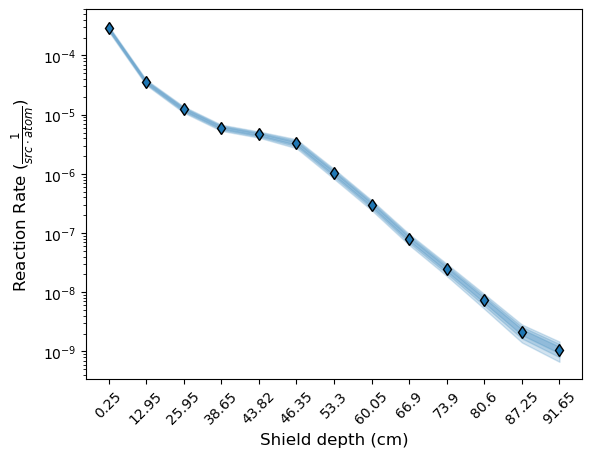

In [34]:
tickers = np.arange(len(results['mean']))

fig, ax = plt.subplots()
osb.plot_stddev_area(ax=ax, ticks=tickers, mean=results['mean'], std_dev=results['std. dev.'],
                     color='tab:blue', alpha=.2, uncertainty_deg=3)
ax.plot(tickers, results['mean'], marker='d', mec='k', ls='', color='tab:blue')
ax.set_xticks(tickers)
ax.set_xticklabels([el.decode() for el in results[xaxis]])
ax.tick_params(axis='x', labelrotation=45)
ax.set_xlabel(xaxis, fontsize=12)
ax.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
ax.set_yscale('log')

plt.show()